In [2]:
import pandas as pd
import numpy as np
import random as rnd
import math
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics    
from sklearn import feature_selection
label=preprocessing.LabelEncoder()
import random as rnd

/home/babacafe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=16,12

def plot_correlation_map( df ):
    corr = df.corr()
    ht , ax = plt.subplots( figsize =( 16 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    ht = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4, row = row , col = col )
    facet.map( sns.distplot , var  ,kde=False)
    facet.set( xlim=( df[var].min() , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    #print(var,l,t)
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels



In [1042]:
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
def Mutual_info(X,y,NaN): #NaN=choose-'yes', 'no' or 'random fill'
    if NaN=='yes':
        print('Yes with NaNs')
        encode_exclude_nans(X)
    elif NaN=='random fill':
        print('Yeah with Random fill of NaNs..good choice')
        print('Please wait... Filling with Random generator so as to get accurate Mutual info score')
        encode_exclude_nans(X)
        fillnans_unique(X)
    elif NaN=='no':
        print('With NaNs of a particular column label encoded as single category ')
        encode_include_nans(X) 
    NF_variable=[]
    mi=[]
    for i in X: 
        x=X[i].ravel()    
#         score=metrics.mutual_info_score(x,y)
        score=nmi(x,y)
        #print(type(score),score)
        #break
        if score >0.25:
          mi.append(score)
          NF_variable.append(i)    
    Mutual_info=pd.DataFrame({'Non Funding Variables':NF_variable,'MI Score':mi})
    return Mutual_info,X

  
def encode_include_nans(data):
    for i in data:
        #t=X.loc[n_null,i].astype('category')
        #X.loc[n_null,i]=t.cat.codes
        #t=X[i].astype('category')
        #X[i]=t.cat.codes        
        try:
            data[i]=label.fit_transform(data[i])
        except:
            data[i]=label.fit_transform(data[i].astype('str'))
    return data

def encode_exclude_nans(data):
    for i in data:
        if df[i].dtypes!='float64':
            n_null=data.loc[:,i].notnull()
            try:
    #             print(i)
                data.loc[n_null,i]=label.fit_transform(data.loc[n_null,i])
            except:
    #             print('exception',i)
                data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
        else:
            print(i)
    
    return data

def fillnans_unique(data):
    #a=np.arange(255,1000)
    for l,i in enumerate(data):
        data.loc[data[i].isna(),i]=data.loc[data[i].isna(),i].apply(lambda z: rnd.randint(data[i].min(),data[i].max()))
    return data
        #for k,j in enumerate(data[i].isna()):
         #   if j==True:
          #      data[i][k]=rnd.choice(a)

In [3]:
train=pd.read_csv('puzzle_train_dataset.csv')
big_train=pd.read_csv('big_case_train.csv')

In [4]:
nondef_id=train[train.default==False].ids.unique()
non_defaulted=big_train[big_train.ids.isin(nondef_id)].groupby(['ids','credit_line'],as_index=False).agg({'card_request':'sum','minutes_cs':'sum','revolving_balance':'sum','spends':'sum','month':'nunique'})
non_defaulted['profit']=non_defaulted['revolving_balance']*0.17+ non_defaulted['spends']*0.05

In [5]:
non_defaulted.shape

(50456, 8)

In [6]:
train.shape

(64592, 29)

In [14]:
undef_id=train[train.default.isnull()].ids.unique()
un_defaulted=big_train[big_train.ids.isin(undef_id)].groupby(['ids','credit_line'],as_index=False).agg({'card_request':'sum','minutes_cs':'sum','revolving_balance':'sum','spends':'sum','month':'nunique'})
un_defaulted['profit']=un_defaulted['revolving_balance']*0.17+ un_defaulted['spends']*0.05

In [13]:
len(undef_id)+len(def_id)+len(nondef_id)

64592

In [15]:
un_defaulted.shape

(4626, 8)

In [157]:
defaulted=pd.read_csv('Defaulted.csv')
defaulted.drop('profits',inplace=True,axis=1)

In [166]:
defaulted[defaulted.profit>1000].shape

(3833, 8)

In [161]:
profits=pd.concat([non_defaulted,un_defaulted,defaulted])

In [167]:
profits.shape

(64592, 8)

In [954]:
profits.head()

,ids,credit_line,card_request,minutes_cs,revolving_balance,spends,month,profit,net_profit,profit_mon,profit_credit,spends_rev,min_mon
0,0003da40-123b-031a-63b3-f7c9f18516ab,20314,3,21.50,40593.92,83373.21,18,11069.6269,10985.8769,610.326494,0.030045,2.053835,1.194444
1,0004a450-07bd-c652-8473-4e9dedcff8b8,19973,1,52.71,20116.58,186575.53,19,12748.5951,12606.8201,663.516847,0.033221,9.274714,2.774211
2,0007cefd-68d7-7627-7286-018fda9465af,2382,2,92.73,464.58,22192.20,24,1188.5886,936.7636,39.031817,0.016386,47.768307,3.863750
3,00080634-5c14-0e3f-5404-7dbfbc2ba91c,7780,2,61.97,9166.69,87855.12,29,5951.0933,5776.1683,199.178217,0.025601,9.584171,2.136897
4,00081f91-63e4-b9ef-e859-af1501bbdd62,2547,3,26.32,2442.43,26972.22,20,1763.8241,1668.0241,83.401205,0.032745,11.043191,1.316000


In [966]:
profits['spends_rev']=profits.spends / profits.revolving_balance
profits['min_mon']=profits.minutes_cs / profits.month
profits['spends_mon']=profits.spends / profits.month
profits['net_profit']=profits.profit - ((profits.minutes_cs*2.5) + (profits.card_request*10))
profits['profit_mon']=profits.net_profit / profits.month
profits['profit_credit']= profits.net_profit /(profits.credit_line * profits.month)

In [973]:
profits.loc[profits.spends_rev==profits.spends_rev.max(),'spends_rev']=profits.loc[profits.spends_rev==profits.spends_rev.max(),'spends']

In [977]:
profits.loc[profits.revolving_balance<1,'spends_rev']=profits.loc[profits.revolving_balance<1,'spends']

In [978]:
profits.head()

,ids,credit_line,card_request,minutes_cs,revolving_balance,spends,month,profit,net_profit,profit_mon,profit_credit,spends_rev,min_mon,spends_mon
0,0003da40-123b-031a-63b3-f7c9f18516ab,20314,3,21.50,40593.92,83373.21,18,11069.6269,10985.8769,610.326494,0.030045,2.053835,1.194444,4631.845000
1,0004a450-07bd-c652-8473-4e9dedcff8b8,19973,1,52.71,20116.58,186575.53,19,12748.5951,12606.8201,663.516847,0.033221,9.274714,2.774211,9819.764737
2,0007cefd-68d7-7627-7286-018fda9465af,2382,2,92.73,464.58,22192.20,24,1188.5886,936.7636,39.031817,0.016386,47.768307,3.863750,924.675000
3,00080634-5c14-0e3f-5404-7dbfbc2ba91c,7780,2,61.97,9166.69,87855.12,29,5951.0933,5776.1683,199.178217,0.025601,9.584171,2.136897,3029.486897
4,00081f91-63e4-b9ef-e859-af1501bbdd62,2547,3,26.32,2442.43,26972.22,20,1763.8241,1668.0241,83.401205,0.032745,11.043191,1.316000,1348.611000


In [232]:
describe_more(train)

,Variable,Levels,Datatype
21,channel,1,object
34,rsn1,1,object
10,borrowed_in_months,2,float64
1,default,2,object
16,facebook_profile,2,object
15,gender,2,object
29,job1,2,object
23,real_state,5,object
26,n_defaulted_loans,5,float64
25,n_bankruptcies,7,float64


In [233]:
train.to_csv('Train_one.csv')

In [53]:
job=train[train.job_name.notnull()].job_name.unique()

In [103]:
pos #85,64,42,21

[89, 88, 87, 86, 85, 68, 67, 66, 65, 64, 46, 45, 44, 43, 42, 22, 21]

In [99]:
n=len(job)
l=len(job[0])
pos=[]
while l>1:
    print('count',l)
    chk=[]
    for i in job:
        first=i[:l-1]
        chk.append(first)
    if len(np.unique(chk))<n:
        n=len(np.unique(chk))
        print(l,n)
        pos.append(l-1)
    l=l-1

count 108
count 107
count 106
count 105
count 104
count 103
count 102
count 101
count 100
count 99
count 98
count 97
count 96
count 95
count 94
count 93
count 92
count 91
count 90
90 44572
count 89
89 42424
count 88
88 28005
count 87
87 24406
count 86
86 20070
count 85
count 84
count 83
count 82
count 81
count 80
count 79
count 78
count 77
count 76
count 75
count 74
count 73
count 72
count 71
count 70
count 69
69 20060
count 68
68 19536
count 67
67 7142
count 66
66 3035
count 65
65 1886
count 64
count 63
count 62
count 61
count 60
count 59
count 58
count 57
count 56
count 55
count 54
count 53
count 52
count 51
count 50
count 49
count 48
count 47
47 1885
count 46
46 1786
count 45
45 274
count 44
44 21
count 43
43 18
count 42
count 41
count 40
count 39
count 38
count 37
count 36
count 35
count 34
count 33
count 32
count 31
count 30
count 29
count 28
count 27
count 26
count 25
count 24
count 23
23 12
count 22
22 2
count 21
count 20
count 19
count 18
count 17
count 16
count 15
count 14
cou

In [311]:
train['job1']=train[train.job_name.notnull()].job_name.apply(lambda z: z[0:21])
train['job2']=train[train.job_name.notnull()].job_name.apply(lambda z: z[21:42])
train['job3']=train[train.job_name.notnull()].job_name.apply(lambda z: z[42:64])
train['job4']=train[train.job_name.notnull()].job_name.apply(lambda z: z[64:85])
train['job5']=train[train.job_name.notnull()].job_name.apply(lambda z: z[85:])

# train['joba']=train[train.job_name.notnull()].job_name.apply(lambda z: z[0:21])
# train['joba1']=train[train.job_name.notnull()].job_name.apply(lambda z: z[21:22])

# train['jobb']=train[train.job_name.notnull()].job_name.apply(lambda z: z[22:42])
# train['jobb1']=train[train.job_name.notnull()].job_name.apply(lambda z: z[42:46])

# train['jobc']=train[train.job_name.notnull()].job_name.apply(lambda z: z[46:64])
# train['jobc1']=train[train.job_name.notnull()].job_name.apply(lambda z: z[64:68])

# train['jobd']=train[train.job_name.notnull()].job_name.apply(lambda z: z[68:85])
# train['jobd1']=train[train.job_name.notnull()].job_name.apply(lambda z: z[85:89])

# train['jobe']=train[train.job_name.notnull()].job_name.apply(lambda z: z[89:])
# train['joba']=train[train.job_name.notnull()].job_name.apply(lambda z: z[0:21])



In [152]:
n=len(rsn)
l=len(rsn[0])
pos2=[]
while l>1:
    print('count',l)
    chk=[]
    for i in rsn:
        first=i[:l-1]
        chk.append(first)
    if len(np.unique(chk))<n:
        n=len(np.unique(chk))
        print(l,n)
        pos2.append(l-1)
    l=l-1

count 128
count 127
count 126
count 125
count 124
count 123
count 122
count 121
count 120
count 119
count 118
count 117
count 116
count 115
count 114
count 113
count 112
112 20344
count 111
111 20294
count 110
110 17775
count 109
109 10298
count 108
108 7579
count 107
107 6436
count 106
count 105
count 104
count 103
count 102
count 101
count 100
count 99
count 98
count 97
count 96
count 95
count 94
count 93
count 92
count 91
count 90
90 6433
count 89
89 6272
count 88
88 3085
count 87
87 1814
count 86
86 1064
count 85
count 84
count 83
count 82
count 81
count 80
count 79
count 78
count 77
count 76
count 75
count 74
count 73
count 72
count 71
count 70
count 69
count 68
68 1063
count 67
67 949
count 66
66 118
count 65
65 54
count 64
count 63
count 62
count 61
count 60
count 59
count 58
count 57
count 56
count 55
count 54
count 53
count 52
count 51
count 50
count 49
count 48
count 47
count 46
count 45
45 53
count 44
44 24
count 43
43 21
count 42
count 41
count 40
count 39
count 38
count 37

In [153]:
pos2 #106,85,64,42,21

[111,
 110,
 109,
 108,
 107,
 106,
 89,
 88,
 87,
 86,
 85,
 67,
 66,
 65,
 64,
 44,
 43,
 42,
 22,
 21]

In [154]:
train['rsn1']=train[train.reason.notnull()].reason.apply(lambda z: z[0:21])
train['rsn2']=train[train.reason.notnull()].reason.apply(lambda z: z[21:42])
train['rsn3']=train[train.reason.notnull()].reason.apply(lambda z: z[42:64])
train['rsn4']=train[train.reason.notnull()].reason.apply(lambda z: z[64:85])
train['rsn5']=train[train.reason.notnull()].reason.apply(lambda z: z[85:106])
train['rsn6']=train[train.reason.notnull()].reason.apply(lambda z: z[106:])

In [134]:
print(len(np.unique(fst)),len(np.unique(sec)),len(np.unique(thd)),len(np.unique(frth)),len(np.unique(ffth)))


2 18 1886 20032 41444


In [61]:
len(np.unique(job))

44604

In [149]:
rsn=train[train.reason.notnull()].reason.unique()

In [150]:
len(rsn)

20345

In [151]:
len(rsn[0])

128

In [229]:
# train['end_last_loan']=pd.to_datetime(train['end_last_loan'], errors='coerce')
# train['last_payment']=pd.to_datetime(train['last_payment'], errors='coerce')
# train['days']=train.end_last_loan - train.last_payment
train['days']=train.days.dt.days

In [963]:
test=pd.read_csv('puzzle_test_dataset.csv')

In [964]:
test['end_last_loan']=pd.to_datetime(test['end_last_loan'], errors='coerce')
test['last_payment']=pd.to_datetime(test['last_payment'], errors='coerce')
test['days']=test.end_last_loan - test.last_payment
test['days']=test.days.dt.days

In [965]:
test['job1']=test[test.job_name.notnull()].job_name.apply(lambda z: z[0:21])
test['job2']=test[test.job_name.notnull()].job_name.apply(lambda z: z[21:42])
test['job3']=test[test.job_name.notnull()].job_name.apply(lambda z: z[42:64])
test['job4']=test[test.job_name.notnull()].job_name.apply(lambda z: z[64:85])
test['job5']=test[test.job_name.notnull()].job_name.apply(lambda z: z[85:])
test['rsn1']=test[test.reason.notnull()].reason.apply(lambda z: z[0:21])
test['rsn2']=test[test.reason.notnull()].reason.apply(lambda z: z[21:42])
test['rsn3']=test[test.reason.notnull()].reason.apply(lambda z: z[42:64])
test['rsn4']=test[test.reason.notnull()].reason.apply(lambda z: z[64:85])
test['rsn5']=test[test.reason.notnull()].reason.apply(lambda z: z[85:106])
test['rsn6']=test[test.reason.notnull()].reason.apply(lambda z: z[106:])

In [234]:
train.shape

(64592, 41)

In [1033]:
profits.shape

(64592, 14)

In [1034]:
profits[profits.net_profit<0].shape

(2565, 14)

In [984]:
train.columns

Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues', 'job1', 'job2', 'job3',
       'job4', 'job5', 'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'days'],
      dtype='object')

In [979]:
profits.to_csv('Profits.csv',index=False)

In [985]:
df=train.merge(profits,on='ids',how='left')

In [1035]:
df.shape

(64592, 54)

In [1036]:
df[df.net_profit<0].shape #no of defaulted persons on which company got loss

(2565, 54)

In [1327]:
df[df.default==1].shape

(9510, 54)

In [1338]:
loss_cust=df_train.groupby(['default','loss'],as_index=False).agg({'ids':'count'})

In [1339]:
loss_cust

,default,loss,ids
0,0,0.0,50451
1,0,1.0,5
2,1,0.0,6951
3,1,1.0,2559


In [1337]:
df_train[(df_train.default==0)&(df_train.loss==1)].net_profit

13625   -40.2199
29955   -17.3320
32430   -58.6812
49110   -60.4135
60470   -28.6889
Name: net_profit, dtype: float64

/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


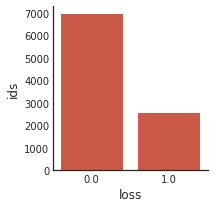

In [1346]:
plot_categories(loss_cust[loss_cust.default==1],cat='loss',target='ids')

/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


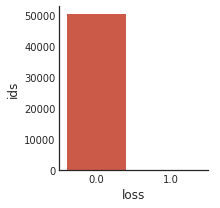

In [1347]:
plot_categories(loss_cust[loss_cust.default!=1],cat='loss',target='ids')

In [1045]:
for i in df:
    if df[i].dtypes=='int64':
        print(i)
        df[i]=df[i].astype('float64')

credit_line
card_request
month


In [1046]:
describe_more(df)

,Variable,Levels,Datatype
34,rsn1,1,object
21,channel,1,object
1,default,2,object
29,job1,2,object
16,facebook_profile,2,object
15,gender,2,object
10,borrowed_in_months,2,float64
26,n_defaulted_loans,5,float64
23,real_state,5,object
2,score_1,7,object


In [1047]:
df.to_csv('Df_final.csv',index=False)

In [1048]:
df.columns

Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues', 'job1', 'job2', 'job3',
       'job4', 'job5', 'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'days',
       'credit_line', 'card_request', 'minutes_cs', 'revolving_balance',
       'spends', 'month', 'profit', 'net_profit', 'profit_mon',
       'profit_credit', 'spends_rev', 'min_mon', 'spends_mon'],
      dtype='object')

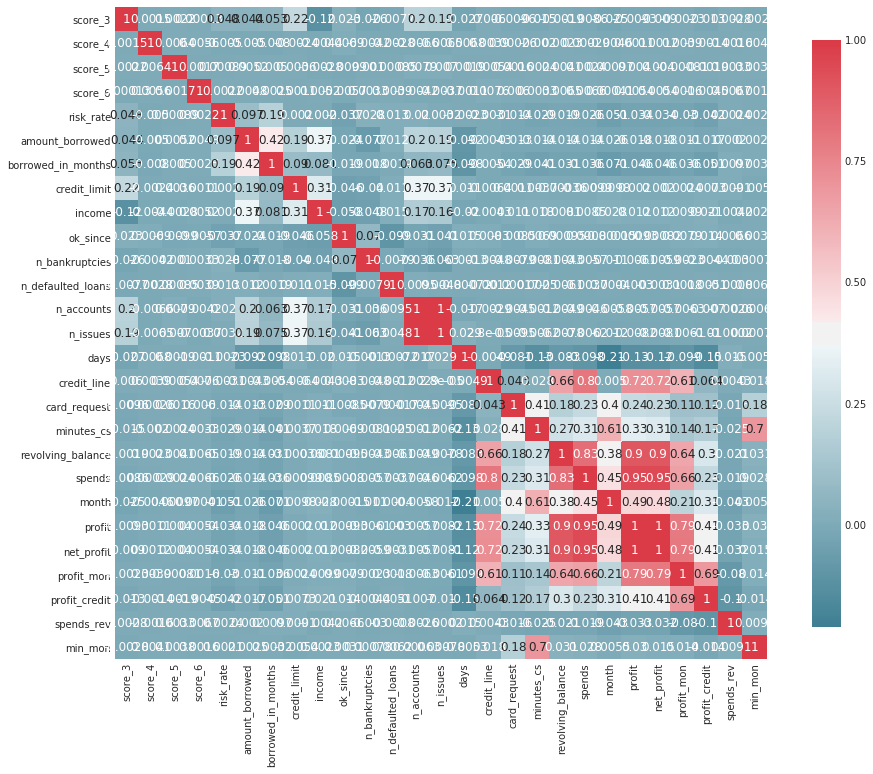

In [240]:
plot_correlation_map(df)

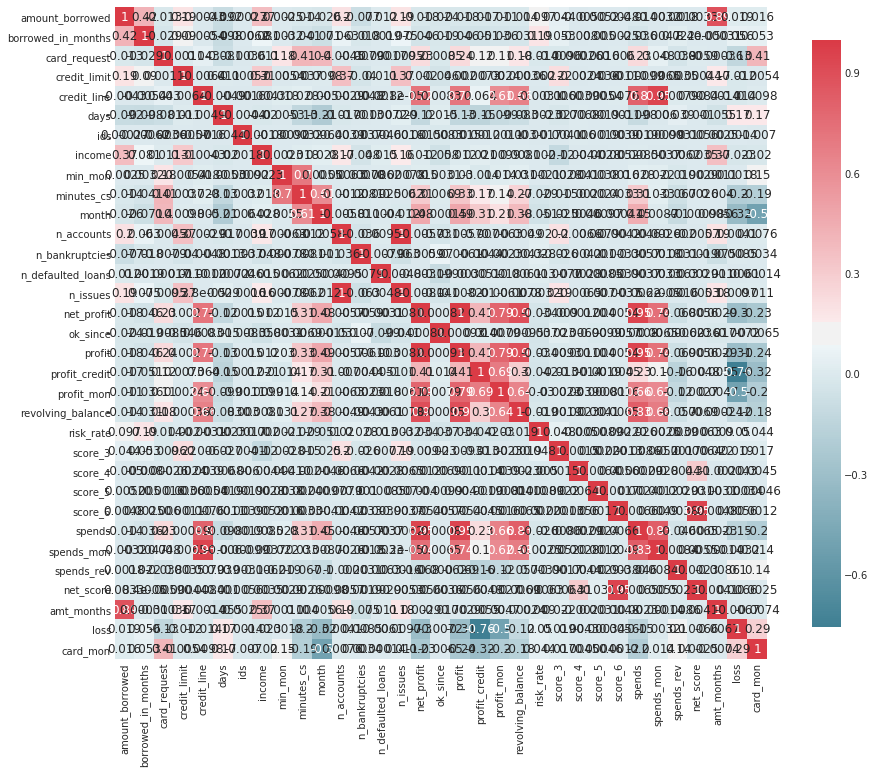

In [1350]:
plot_correlation_map(df_train)

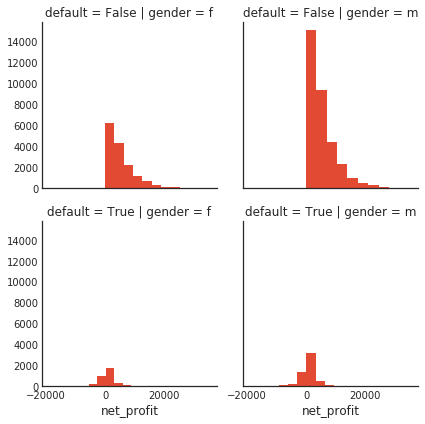

In [178]:
g=sns.FacetGrid(df,col='gender',row='default')
g.map(plt.hist,'net_profit',bins=10)

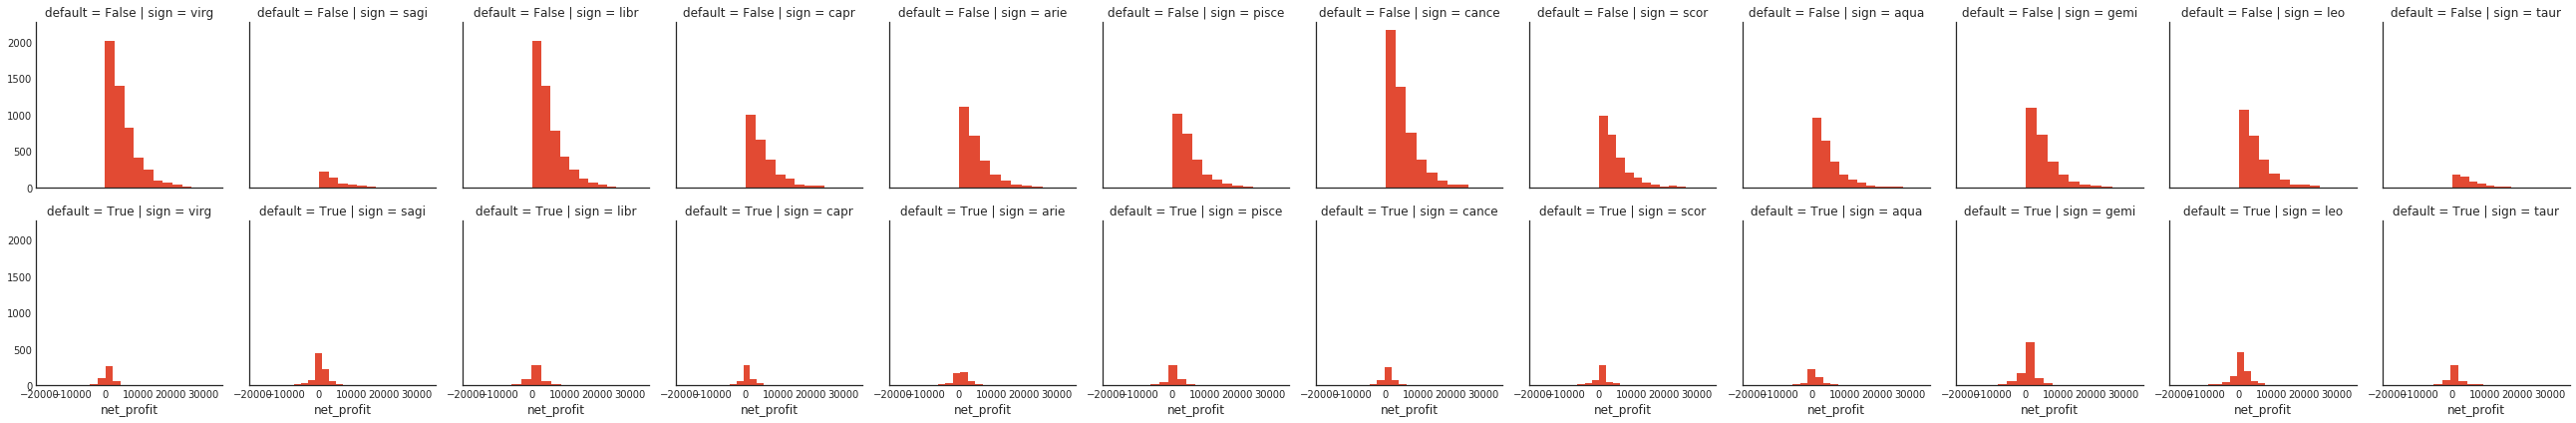

In [1353]:
g=sns.FacetGrid(df,col='sign',row='default')
g.map(plt.hist,'net_profit',bins=10)

In [1356]:
sign_cust=df_train.groupby(['sign','default'],as_index=False).agg({'ids':'count'})

In [1361]:
sign_cust

,sign,default,ids
0,0,0,2387
1,0,1,452
2,1,0,2564
3,1,1,481
4,2,0,5066
5,2,1,475
6,3,0,2451
7,3,1,507
8,4,0,2508
9,4,1,991


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


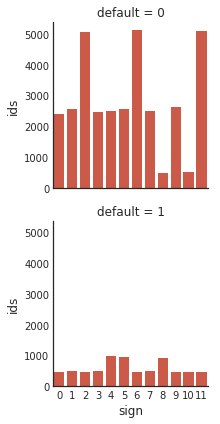

In [1357]:
plot_categories(sign_cust,cat='sign',target='ids',row='default')

In [1358]:
gender_cust=df_train.groupby(['gender','default'],as_index=False).agg({'ids':'count'})

/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


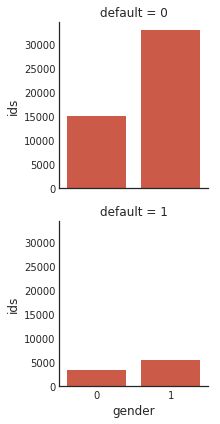

In [1360]:
plot_categories(gender_cust,cat='gender',target='ids',row='default')

/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


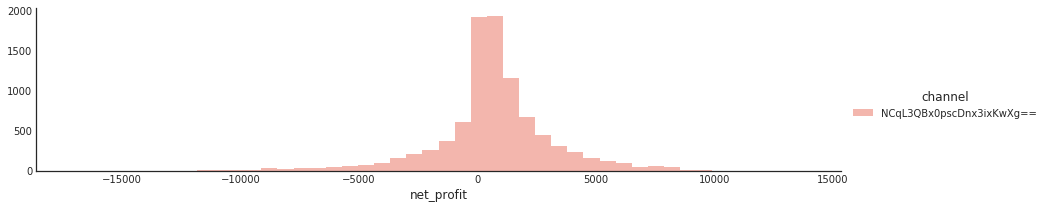

In [208]:
plot_distribution(df[df.default==True],'net_profit','channel')

In [245]:
df.shape

(64592, 53)

In [962]:
test.columns

Index(['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit',
       'reason', 'income', 'sign', 'gender', 'facebook_profile',
       'last_payment', 'end_last_loan', 'state', 'zip', 'channel', 'job_name',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'days'],
      dtype='object')

In [487]:
test_col

['ids',
 'score_1',
 'score_2',
 'score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'reason',
 'income',
 'sign',
 'gender',
 'facebook_profile',
 'last_payment',
 'end_last_loan',
 'state',
 'zip',
 'channel',
 'job_name',
 'real_state',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues',
 'days',
 'net_score',
 'amt_months']

In [486]:
test_col=list(test.columns)+['net_score','amt_months']
test.shape

(35000, 29)

In [444]:
# test_col1=test.columns
# test.shape
test_col1=list(test_col1)+['net_score']

In [1049]:
Train=pd.concat([df,test])
# Train1=pd.concat([df,test])

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [1050]:
Train.shape

(99592, 54)

In [1051]:
Train=encode_exclude_nans(Train)
# Train1=encode_exclude_nans(Train1)

amount_borrowed
borrowed_in_months
card_request
credit_limit
credit_line
days
income
min_mon
minutes_cs
month
n_accounts
n_bankruptcies
n_defaulted_loans
n_issues
net_profit
ok_since
profit
profit_credit
profit_mon
revolving_balance
risk_rate
score_3
score_4
score_5
score_6
spends
spends_mon
spends_rev


In [1052]:
Train['net_score']=Train.score_4+Train.score_5+Train.score_6
# Train1['net_score']=Train1.score_4+Train1.score_5+Train1.score_6
Train['amt_months']=Train.amount_borrowed / Train.borrowed_in_months

In [1053]:
Train.to_csv('Train_Final.csv')
# Train1.to_csv('Train1_final.csv')

In [8]:
# Train=pd.read_csv('Train_Final.csv')
Train.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
Train.head()

,amount_borrowed,borrowed_in_months,card_request,channel,credit_limit,credit_line,days,default,end_last_loan,facebook_profile,...,score_5,score_6,sign,spends,spends_mon,spends_rev,state,zip,net_score,amt_months
0,20024.31,60.0,3.0,0.0,62386.0,1285.0,396.0,0.0,95.0,1.0,...,0.661509,123.015325,11.0,13194.85,488.698148,7.398248,47.0,592.0,227.851795,333.738500
1,10046.51,36.0,2.0,0.0,NaN,17941.0,0.0,0.0,75.0,0.0,...,0.531115,110.913484,8.0,153756.36,7687.818000,5.255790,47.0,690.0,209.325398,279.069722
2,21228.25,60.0,3.0,0.0,NaN,12717.0,181.0,0.0,111.0,1.0,...,0.611086,104.620791,6.0,123160.30,5598.195455,16.109472,3.0,173.0,203.140802,353.804167
3,23032.33,36.0,1.0,0.0,NaN,17819.0,0.0,0.0,85.0,0.0,...,0.139784,120.134718,NaN,243582.34,8399.391034,12.499216,20.0,511.0,220.709059,639.786944
4,24026.29,36.0,2.0,0.0,32366.0,4997.0,151.0,0.0,111.0,NaN,...,0.002856,104.320462,6.0,62029.38,2138.944138,3.330326,44.0,802.0,208.097955,667.396944


In [1054]:
Train[Train.net_profit<0].shape

(2565, 56)

In [10]:
df_train=Train[0:64592]
# df_test=Train[64592:]
# df_train1=Train1[0:64592]
# df_test1=Train1[64592:]

In [829]:
df_def.loc[df_train.net_profit<0,'default']=2
df_def=df_def[df_def.default.notnull()]

# df_def=df_train[df_train.default.notnull()]

# df_def1=df_train1[df_train1.default.notnull()]

/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [830]:
df_def.default.unique()

array([0, 1, 2])

In [839]:
train_def=df_def[test_col]
test_def=df_test[test_col]
target_def=df_def['default']
train_def.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
test_def.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
# train_def1=df_def1[test_col1]
# train_def1.drop(['ids','job1','job2','job3','rsn1','rsn2','rsn3','rsn4','channel','end_last_loan','last_payment','days'],axis=1,inplace=True)
# target_def1=df_def1['default']

/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [370]:
df_def1[df_def1.default==0].shape[0]/df_def1[df_def1.default==1].shape[0]

5.305573080967402

In [656]:
train_def.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit',
       'reason', 'income', 'gender', 'facebook_profile', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues', 'net_score',
       'amt_months'],
      dtype='object')

In [493]:
train_def.amt_months.nunique()

52363

In [453]:
train_def1.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit',
       'reason', 'income', 'sign', 'gender', 'facebook_profile', 'state',
       'zip', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues', 'job4', 'job5', 'rsn5',
       'rsn6', 'net_score'],
      dtype='object')

In [840]:
train_def=train_def.fillna(np.nan)
test_def=test_def.fillna(np.nan)
# train_def1=train_def1.fillna(np.nan)

In [658]:
train_X, test_X, train_target, test_target= train_test_split(train_def , target_def, train_size = 0.75,stratify=target_def,random_state=17)
# train_X, test_X, train_target, test_target= train_test_split(train_def1 , target_def1, train_size = 0.75,stratify=target_def1,random_state=17)

In [594]:
params={'objective': 'binary:logistic','max_depth': 5,'eta': 0.1,'scale_pose_weight':5,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'error' ,'silent':0}   
xgtrain = xgb.DMatrix(train_X, label=train_target)
xgtest= xgb.DMatrix(test_X,label=test_target) 

watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
num_round=90

model=xgb.train(params,xgtrain,num_round,watchlist)
# 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

[23:21:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	eval-error:0.150213	train-error:0.151621
[23:21:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	eval-error:0.150147	train-error:0.151954
[23:21:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[2]	eval-error:0.153348	train-error:0.153689
[23:21:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	eval-error:0.150747	train-error:0.151043
[23:21:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	eval-error:0.151547	train-error:0.151488
[23:21:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[5]	eval-error:0.152415	train-error:0

[23:21:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[49]	eval-error:0.147612	train-error:0.143661
[23:21:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[50]	eval-error:0.147212	train-error:0.143772
[23:21:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[51]	eval-error:0.147012	train-error:0.143639
[23:21:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[52]	eval-error:0.146812	train-error:0.143194
[23:21:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[53]	eval-error:0.146878	train-error:0.143016
[23:21:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[54]	eval-error:0.146345	train-e

In [691]:
params={'objective': 'binary:logistic','max_depth': 5,'eta': 0.1,'scale_pose_weight':5,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'error' ,'silent':0}   
xgtrain = xgb.DMatrix(train_def, label=target_def)


watchlist =  [(xgtrain, 'train')]
num_round=90

model_def=xgb.train(params,xgtrain,num_round,watchlist)
# 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

[00:16:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-error:0.15352
[00:16:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-error:0.151886
[00:16:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-error:0.151486
[00:16:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-error:0.152837
[00:16:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-error:0.154404
[00:16:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-error:0.154371
[00:16:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, ma

[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[56]	train-error:0.142447
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[57]	train-error:0.142447
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[58]	train-error:0.142397
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[59]	train-error:0.142114
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[60]	train-error:0.141964
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[61]	train-error:0.14173
[00:16:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nod

In [842]:
params={'objective': 'multi:softprob','max_depth': 4,'num_class':3,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'merror' ,'silent':0}   
xgtrain = xgb.DMatrix(train_def, label=target_def)
# xgtest= xgb.DMatrix(test_X,label=test_target) 

watchlist =  [ (xgtrain, 'train')]
num_round=90

model_default=xgb.train(params,xgtrain,num_round,watchlist)
# 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

[03:23:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-merror:0.158673
[03:23:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-merror:0.15819
[03:23:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra 

[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[21]	train-merror:0.157272
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[22]	train-merror:0.157272
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:23:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 ext

[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[42]	train-merror:0.154588
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[43]	train-merror:0.154521
[03:24:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 ext

[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[63]	train-merror:0.152286
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[64]	train-merror:0.152286
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[03:24:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 ext

[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[84]	train-merror:0.150819
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[85]	train-merror:0.150802
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[03:24:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 ext

In [843]:
test_x= xgb.DMatrix(test_def)
# pred_prob_default=model_default.predict(test_x)
pred_prob=model_default.predict(test_x)

In [699]:
test_x_def= xgb.DMatrix(test_def)
pred_prob_def=model_def.predict(test_x_def)

In [704]:
predict=pred_prob_def>0.7
predict=predict.astype(int)

In [835]:
pred=pred_prob.copy()
# pred=[]
for j,i in enumerate(pred_prob):
    if (i[2]>i[1]) & (i[0]<0.7):
        print(j,i)
        pred[j][2]=2

469 [0.5876884  0.18536964 0.22694193]
5082 [0.5601041  0.21463954 0.22525637]
6696 [0.58398384 0.10404117 0.31197497]
11330 [0.39104244 0.2999944  0.3089632 ]
18354 [0.5967151  0.1853555  0.21792935]
22668 [0.645946   0.15623404 0.1978199 ]
23089 [0.39753178 0.28455836 0.31790987]
25875 [0.6374031  0.1608138  0.20178317]
26558 [0.6176075  0.13256726 0.24982528]
27330 [0.45028338 0.27437776 0.27533883]
28207 [0.3543076  0.30987215 0.3358203 ]
29002 [0.64347136 0.17695647 0.17957217]
30784 [0.50820774 0.24164163 0.25015068]
31745 [0.5858383  0.17980775 0.23435393]
32214 [0.5241626  0.23077267 0.24506477]
33243 [0.6086043  0.17729284 0.21410283]


In [844]:
#with sign
pred=pred_prob.copy()
# pred=[]
for j,i in enumerate(pred_prob):
    if (i[2]>i[1]) & (i[0]<0.7):
        print(j,i)
        pred[j][2]=2


6696 [0.6097811  0.15780187 0.2324171 ]
10661 [0.4544032  0.26697087 0.278626  ]
13332 [0.69801587 0.12508406 0.17690006]
13855 [0.5589788  0.21611331 0.22490788]
20389 [0.39318466 0.2834493  0.32336608]
22240 [0.43000293 0.25475928 0.31523776]
22844 [0.23703298 0.37174687 0.3912202 ]
27758 [0.50230837 0.24096125 0.2567304 ]
29002 [0.677279   0.13963017 0.1830908 ]
30784 [0.4872024  0.25041777 0.26237983]


In [845]:
prediction=np.asarray([np.argmax(line) for line in pred])

In [846]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [847]:
df_test['default_nosign_2']=prediction

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [789]:
df_test.default_2.unique()

array([0, 1, 2])

In [688]:
# df_test['default_nosign_0.5']=predict
# df_test['default_nosign_0.7']=predict

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [848]:
df_test[df_test.default_2==2].shape

(10, 61)

In [841]:
df_test[df_test.default_nosign_2==2].shape

(16, 61)

In [805]:
df_test[df_test['default_0.5']==1].shape

(1750, 61)

In [806]:
df_test[df_test['default_nosign_0.5']==1].shape

(1013, 61)

In [1366]:
df_test[df_test['default_nosign_0.7']==1].shape

(46, 62)

In [1367]:
df_test[df_test['default_0.7']==1].shape

(483, 62)

In [884]:
df_test.to_csv('df_default.csv',index=False)

In [793]:
df_test.columns

Index(['amount_borrowed', 'borrowed_in_months', 'card_request', 'channel',
       'credit_limit', 'credit_line', 'days', 'default', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 'min_mon', 'minutes_cs',
       'month', 'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'net_profit', 'ok_since', 'profit', 'profit_credit',
       'profit_mon', 'real_state', 'reason', 'revolving_balance', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign', 'spends',
       'spends_rev', 'state', 'zip', 'net_score', 'amt_months', 'default_0.7',
       'default_nosign_0.7', 'default_0.5', 'default_nosign_0.5', 'default_2',
       'default_nosign_2'],
      dtype='object')

In [1296]:
data_test=pd.read_csv('df_default.csv')
for i in ['default_0.7',
       'default_nosign_0.7', 'default_0.5', 'default_nosign_0.5', 'default_2',
       'default_nosign_2']:
    df_test[i]=data_test[i]

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1299]:
df_test.to_csv('Df_Test.csv',index=False)

In [1362]:
imp=[]
for i in model_default.get_fscore().items():
    imp.append(i)


In [1363]:
# thresholds = np.sort(model.feature_importances_)
# features = model.feature_importances_
2

pd.DataFrame(imp, columns=['feature','importance']).sort_values('importance', ascending=False)

,feature,importance
2,sign,664
6,income,378
4,score_1,277
3,job_name,225
7,amount_borrowed,202
8,risk_rate,188
15,score_2,166
1,facebook_profile,160
10,score_4,153
12,score_3,146


In [95]:
# df_train[(df_train.net_profit>0)&(df_train.default==1)].net_profit.sum()/len(df_train[(df_train.net_profit>0)&(df_train.default==1)])

1716.80355215077

In [96]:
# df_train[(df_train.net_profit>0)&(df_train.default==1)].profit_mon.sum()/len(df_train[(df_train.net_profit>0)&(df_train.default==1)])

180.1493808800334

In [796]:
# df_train[(df_train.default==1)].profit_mon.sum()/len(df_train[(df_train.default==1)])

29.56603727326006

In [1056]:
# df_train[(df_train.default==1)].net_profit.sum()/len(df_train[(df_train.default==1)])

627.7512982544692

In [1057]:
# df_train[(df_train.default!=1)].net_profit.sum()/len(df_train[(df_train.default!=1)])

5217.893804994373

In [799]:
# df_train[(df_train.default!=1)].profit_mon.sum()/len(df_train[(df_train.default!=1)])

217.35273495406247

In [102]:
def_pm=df_train.groupby('default',as_index=False).agg({'profit_mon':'mean'})
def_pm

,default,profit_mon
0,0.0,217.399833
1,1.0,29.566037


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


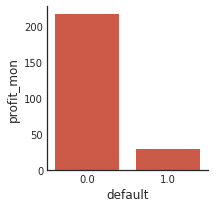

In [106]:
plot_categories(def_pm,target='profit_mon',cat='default')

In [103]:
def_np=df_train.groupby('default',as_index=False).agg({'net_profit':'mean'})
def_np

,default,net_profit
0,0.0,5220.437092
1,1.0,627.751298


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


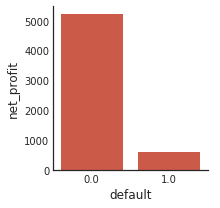

In [110]:
plot_categories(def_np,target='net_profit',cat='default')

In [104]:
def_pm_0=df_train[df_train.net_profit>0].groupby('default',as_index=False).agg({'profit_mon':'mean'})
def_pm_0

,default,profit_mon
0,0.0,217.421658
1,1.0,180.149381


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


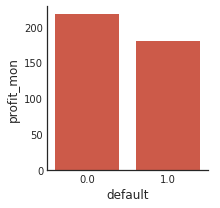

In [107]:
plot_categories(def_pm_0,target='profit_mon',cat='default')

In [105]:
def_np_0=df_train[df_train.net_profit>0].groupby('default',as_index=False).agg({'net_profit':'mean'})
def_np_0

,default,net_profit
0,0.0,5220.958539
1,1.0,1716.803552


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


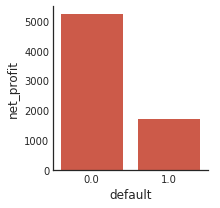

In [109]:
plot_categories(def_np_0,target='net_profit',cat='default')

In [1059]:
df_train.loc[(df_train.net_profit>0)|(df_train.net_profit==0),'loss']=0
df_train.loc[df_train.net_profit<0,'loss']=1

/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [819]:
df_train.columns

Index(['amount_borrowed', 'borrowed_in_months', 'card_request', 'channel',
       'credit_limit', 'credit_line', 'days', 'default', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 'min_mon', 'minutes_cs',
       'month', 'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'net_profit', 'ok_since', 'profit', 'profit_credit',
       'profit_mon', 'real_state', 'reason', 'revolving_balance', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign', 'spends',
       'spends_rev', 'state', 'zip', 'net_score', 'amt_months', 'loss'],
      dtype='object')

In [1063]:
# df_train.net_profit.isnull().sum()
df_train.profit_mon.isnull().sum()
# df_train[df_train.net_profit<0].shape

0

In [1064]:
df_train.to_csv('Df_Train.csv',index=False)

In [26]:
df_train['card_mon']= df_train.card_request / df_train.month

In [11]:
df_train=pd.read_csv('Df_Train.csv')

In [12]:
profit_col1=['amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'days', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 
         'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'ok_since',
        'real_state', 'reason', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign', 'state', 'zip', 'net_score', 'amt_months']
#'card_request','profit_credit','profit_mon','spends','spends_rev','revolving_balance','min_mon', 'minutes_cs','month', 'credit_line'

In [94]:
profit_col=['amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'credit_line', 'days', 'default', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 
        'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'ok_since',
        'real_state', 'reason', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign' , 'state', 'zip', 'net_score', 'amt_months','spends_mon',
        'card_mon','min_mon','spends_rev']

In [14]:
behavior_col=['amount_borrowed', 'borrowed_in_months',
       'credit_limit',  'days', 'default', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 
        'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'ok_since',
        'real_state', 'reason', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign' , 'state', 'zip', 'net_score', 'amt_months']

In [24]:
behavior_targetcols=['spends_mon','credit_line','card_mon','min_mon','spends_rev']

In [15]:
df_train.spends_rev.isnull().sum()

0

In [923]:
df_train.spends_mon.dtypes

dtype('float64')

In [919]:
for i in behavior_targetcols:
    print(df_train[i].nunique())

57536
15490
9
48179
57692


In [1067]:
df_train.loss.value_counts()

0.0    62027
1.0     2565
Name: loss, dtype: int64

net_profit
profit_col 0


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[0]	eval-rmse:5853.41	train-rmse:5911.31
[1]	eval-rmse:5358.65	train-rmse:5412.65
[2]	eval-rmse:4916.39	train-rmse:4966.12
[3]	eval-rmse:4540.45	train-rmse:4585.5
[4]	eval-rmse:4178.24	train-rmse:4220.89
[5]	eval-rmse:3868.15	train-rmse:3907.42
[6]	eval-rmse:3594.9	train-rmse:3630.6
[7]	eval-rmse:3372.13	train-rmse:3405.4
[8]	eval-rmse:3159.48	train-rmse:3188.31
[9]	eval-rmse:2965.7	train-rmse:2993.28
[10]	eval-rmse:2853.37	train-rmse:2878.66
[11]	eval-rmse:2701.26	train-rmse:2722.26
[12]	eval-rmse:2578.09	train-rmse:2596.65
[13]	eval-rmse:2467.5	train-rmse:2484.19
[14]	eval-rmse:2368.51	train-rmse:2382.69
[15]	eval-rmse:2283.69	train-rmse:2295.02
[16]	eval-rmse:2212.28	train-rmse:2221.33
[17]	eval-rmse:2148.18	train-rmse:2153.62
[18]	eval-rmse:2115.56	train-rmse:2119.31
[19]	eval-rmse:2067.11	train-rmse:2068.16
[20]	eval-rmse:2028.36	train-rmse:2026.86
[21]	eval-rmse:1994.57	train-rmse:1990.3
[22]	eval-rmse:1965.47	train-rmse:1959.19
[23]	eval-rmse:1939.48	train-rmse:1930.82
[24]	eval

[97]	eval-rmse:4526.1	train-rmse:4420.7
[98]	eval-rmse:4526.35	train-rmse:4419.29
[99]	eval-rmse:4525.97	train-rmse:4417.41
profit_mon
profit_col 0
[0]	eval-rmse:272.83	train-rmse:276.108
[1]	eval-rmse:254.337	train-rmse:257.557
[2]	eval-rmse:238.07	train-rmse:241.017
[3]	eval-rmse:224.411	train-rmse:226.554
[4]	eval-rmse:211.599	train-rmse:213.187
[5]	eval-rmse:200.457	train-rmse:201.615
[6]	eval-rmse:191.577	train-rmse:191.899
[7]	eval-rmse:184.012	train-rmse:183.938
[8]	eval-rmse:177.043	train-rmse:176.186
[9]	eval-rmse:171.054	train-rmse:169.454
[10]	eval-rmse:167.264	train-rmse:165.367
[11]	eval-rmse:162.316	train-rmse:160.044
[12]	eval-rmse:158.794	train-rmse:156.056
[13]	eval-rmse:155.58	train-rmse:152.413
[14]	eval-rmse:152.675	train-rmse:148.44
[15]	eval-rmse:150.002	train-rmse:145.153
[16]	eval-rmse:148.524	train-rmse:142.993
[17]	eval-rmse:146.623	train-rmse:140.289
[18]	eval-rmse:145.709	train-rmse:139.164
[19]	eval-rmse:144.789	train-rmse:137.293
[20]	eval-rmse:144.051	tra

[93]	eval-rmse:225.324	train-rmse:218.431
[94]	eval-rmse:225.312	train-rmse:218.273
[95]	eval-rmse:225.316	train-rmse:218.217
[96]	eval-rmse:225.347	train-rmse:218.16
[97]	eval-rmse:225.363	train-rmse:218.102
[98]	eval-rmse:225.384	train-rmse:218.021
[99]	eval-rmse:225.424	train-rmse:217.928


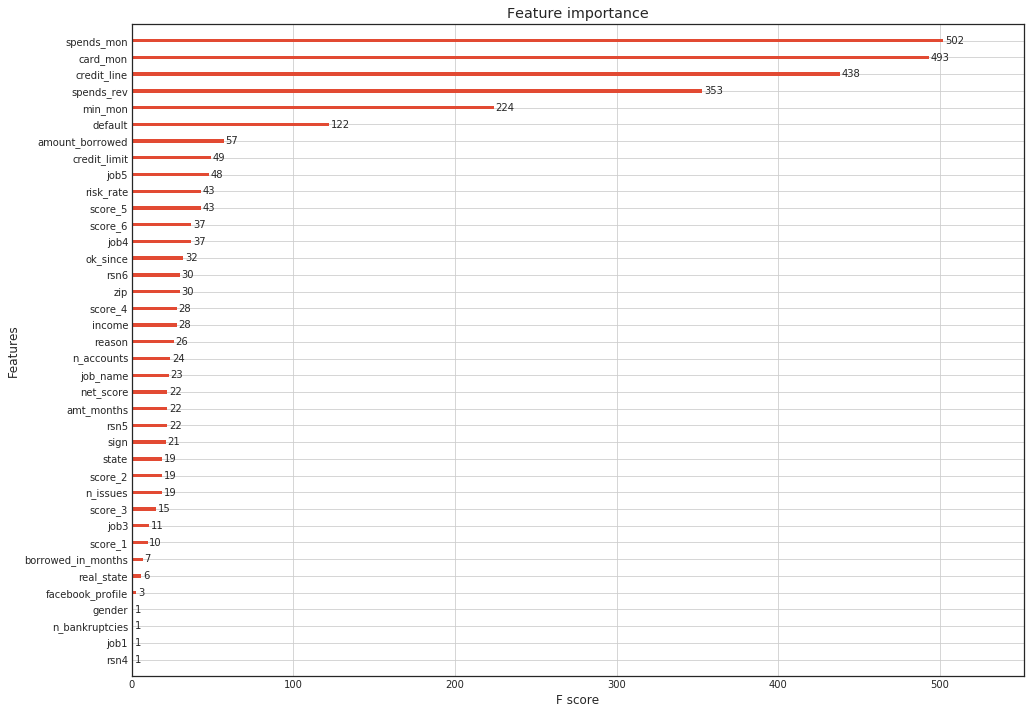

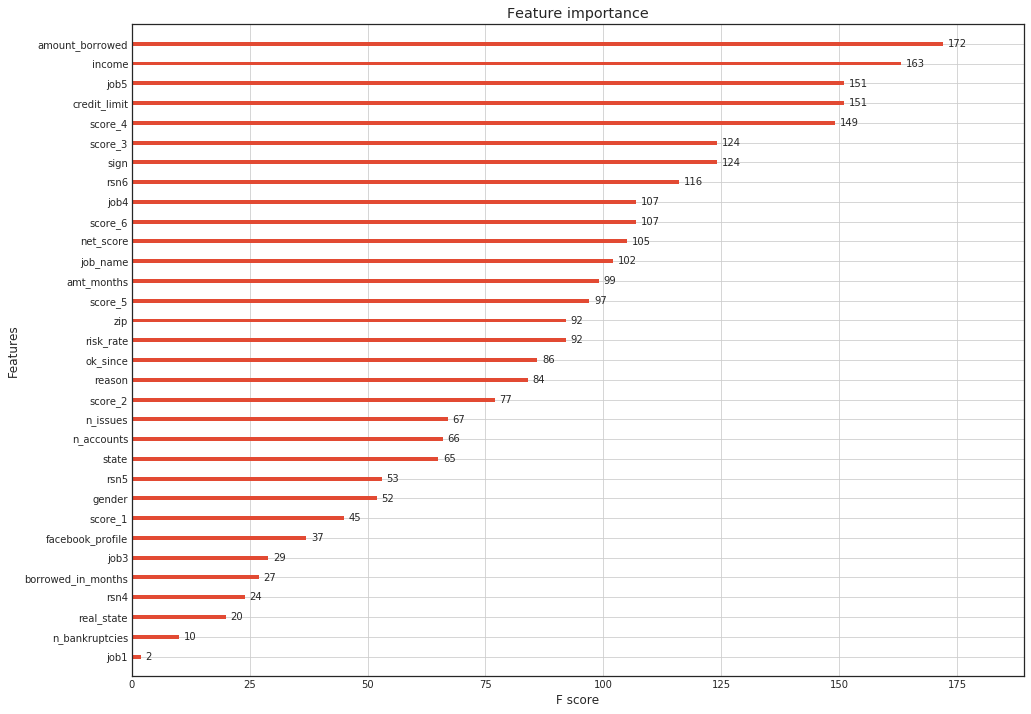

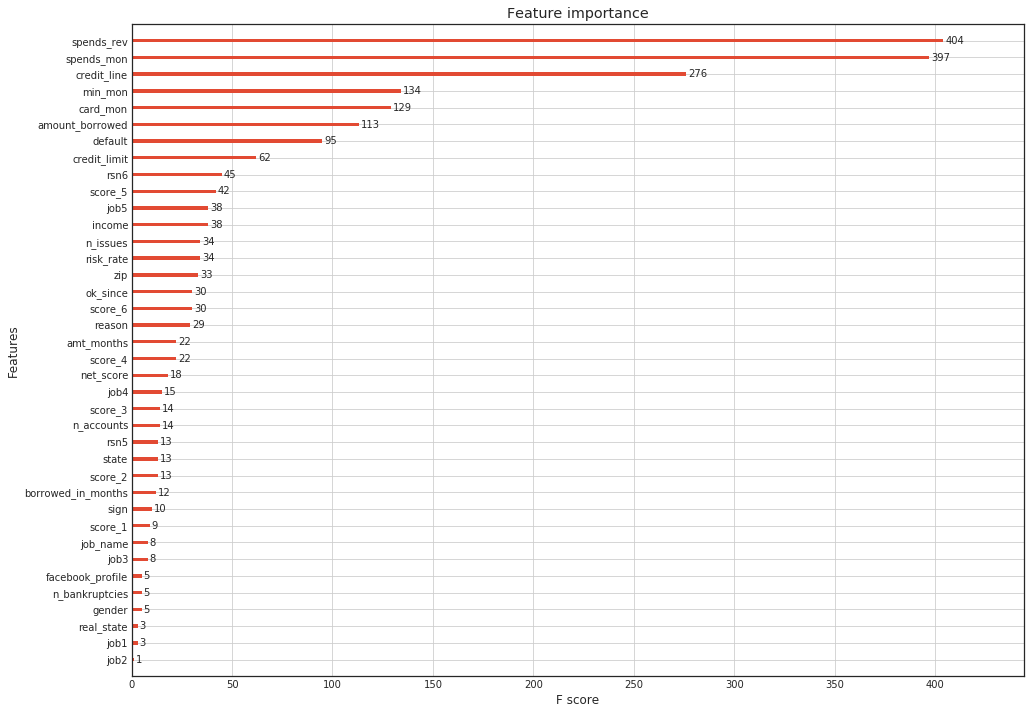

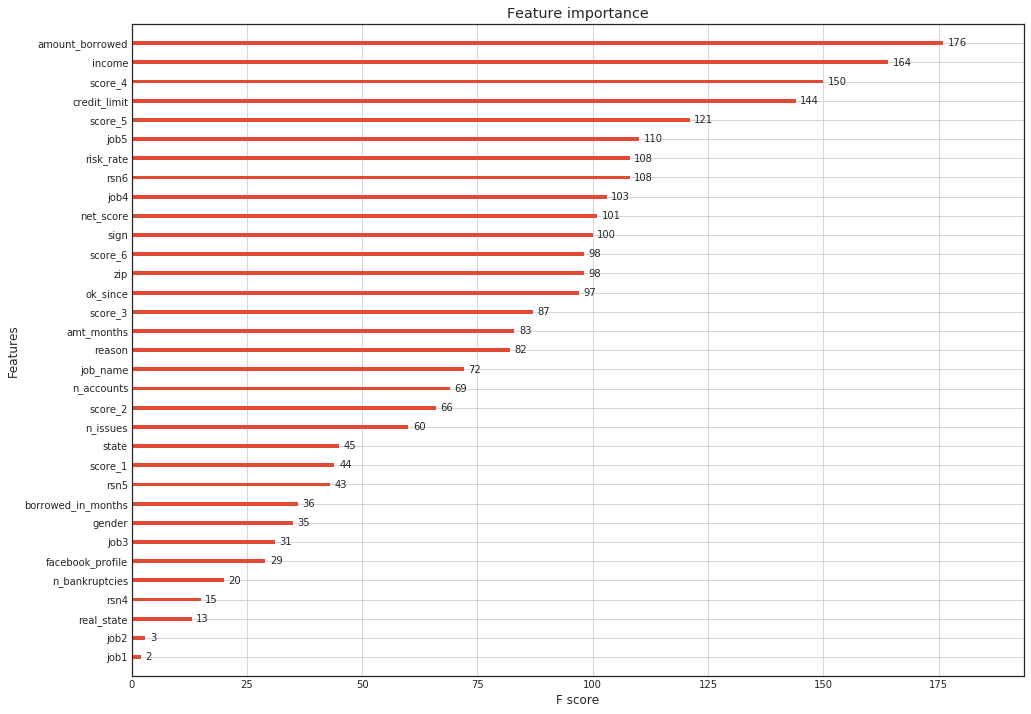

In [1093]:
models=[]
for i in ['net_profit','profit_mon']:
    print(i)
    for k,j in enumerate([profit_col,profit_col1]):
        print('profit_col',k)
        train_profit=df_train[j]
        # test_profit=df_test[profit_col]
        target_profit=df_train[i]
        train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        # test_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        # train_def1=df_def1[test_col1]
        # train_def1.drop(['ids','job1','job2','job3','rsn1','rsn2','rsn3','rsn4','channel','end_last_loan','last_payment','days'],axis=1,inplace=True)
        # target_def1=df_def1['default']
        train_profit=train_profit.fillna(np.nan)
        # test_profit=test_profit.fillna(np.nan)
        train_X, test_X, train_target, test_target= train_test_split(train_profit , target_profit, train_size = 0.80,
                                                 stratify=df_train.loss ,  random_state=17)
        params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
                'eval_metric':'rmse' ,'silent':1}   
        xgtrain = xgb.DMatrix(train_X, label=train_target)
        xgtest= xgb.DMatrix(test_X,label=test_target) 

        watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
        num_round=100

        model=xgb.train(params,xgtrain,num_round,watchlist)
        models.append(model)
        xgb.plot_importance(model)
# 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

In [1122]:
behavior=pd.DataFrame()
for i in behavior_targetcols:
    print('target',i)
    train_profit=df_train[behavior_col]
    # test_profit=df_test[profit_col]
    target_profit=df_train[i]
    train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)

    train_profit=train_profit.fillna(np.nan)
    train_X, test_X, train_target, test_target= train_test_split(train_profit , target_profit, train_size = 0.80,
                                                                 stratify=df_train.loss,random_state=17)
    params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'rmse' ,'silent':0}   
    xgtrain = xgb.DMatrix(train_X, label=train_target)
    xgtest= xgb.DMatrix(test_X,label=test_target) 

    watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
    num_round=40

    model=xgb.train(params,xgtrain,num_round,watchlist)
    test_x=xgb.DMatrix(test_X)
    pred=model.predict(test_x)
    try:
        beh_target[i]=pred
    except:
        beh_target=pd.DataFrame({i:pred},index=test_X.index)
#     behavior=pd.concat([behavior,beh_target])

target spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[16:18:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[0]	eval-rmse:3326.59	train-rmse:3357.6
[16:18:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	eval-rmse:3132.97	train-rmse:3163.3
[16:18:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	eval-rmse:2966.39	train-rmse:2995.61
[16:18:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[3]	eval-rmse:2824.77	train-rmse:2852.96
[16:18:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	eval-rmse:2704.62	train-rmse:2731.27
[16:18:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[5]	eval-rmse:2602.84	train-rmse:2628.26
[16:18:13] /worksp

[16:18:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[10]	eval-rmse:4964.39	train-rmse:4967.54
[16:18:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[11]	eval-rmse:4887.47	train-rmse:4886.81
[16:18:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[12]	eval-rmse:4825.5	train-rmse:4821.91
[16:18:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13]	eval-rmse:4774.57	train-rmse:4767.52
[16:18:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[14]	eval-rmse:4732.38	train-rmse:4722.58
[16:18:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[15]	eval-rmse:4697.84	train-rmse:4684.89
[16:18:22] 

[16:18:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[20]	eval-rmse:0.073532	train-rmse:0.072871
[16:18:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21]	eval-rmse:0.07106	train-rmse:0.070347
[16:18:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[22]	eval-rmse:0.069017	train-rmse:0.06827
[16:18:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[23]	eval-rmse:0.067316	train-rmse:0.066536
[16:18:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[24]	eval-rmse:0.065872	train-rmse:0.065041
[16:18:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[25]	eval-rmse:0.064691	train-rmse:0.063803


[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[30]	eval-rmse:1.61962	train-rmse:1.59847
[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[31]	eval-rmse:1.61922	train-rmse:1.59768
[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[32]	eval-rmse:1.61884	train-rmse:1.59695
[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[33]	eval-rmse:1.61845	train-rmse:1.59588
[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[34]	eval-rmse:1.6182	train-rmse:1.59553
[16:18:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[35]	eval-rmse:1.61799	train-rmse:1.59505
[16:18:40] 

In [1124]:
beh_target.head()

,spends_rev,spends_mon,credit_line,card_mon,min_mon
51475,9.696451,2809.323730,6332.714355,0.097605,2.799218
31876,11.194098,2739.098389,6166.401855,0.098529,2.724289
23330,15.219429,3007.933105,5890.606934,0.102982,2.814362
8254,5.515213,2870.304688,6381.488281,0.099288,2.775076
53546,199.062973,2932.421631,6343.163574,0.179110,2.683898


net_profit
profit_col 0


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


credit_line
card_mon
min_mon
spends_rev
[0]	eval-rmse:6050.73	train-rmse:5911.31
[1]	eval-rmse:5824.4	train-rmse:5412.65
[2]	eval-rmse:5556.78	train-rmse:4966.12
[3]	eval-rmse:5323.81	train-rmse:4585.5
[4]	eval-rmse:5174.14	train-rmse:4220.89
[5]	eval-rmse:5028.25	train-rmse:3907.42
[6]	eval-rmse:4911.44	train-rmse:3630.6
[7]	eval-rmse:4820.06	train-rmse:3405.4
[8]	eval-rmse:4712.72	train-rmse:3188.31
[9]	eval-rmse:4658.34	train-rmse:2993.28
[10]	eval-rmse:4602.5	train-rmse:2878.66
[11]	eval-rmse:4554.26	train-rmse:2722.26
[12]	eval-rmse:4510.54	train-rmse:2596.65
[13]	eval-rmse:4479.36	train-rmse:2484.19
[14]	eval-rmse:4454.14	train-rmse:2382.69
[15]	eval-rmse:4433.5	train-rmse:2295.02
[16]	eval-rmse:4422.01	train-rmse:2221.33
[17]	eval-rmse:4401.35	train-rmse:2153.62
[18]	eval-rmse:4382.41	train-rmse:2119.31
[19]	eval-rmse:4379.05	train-rmse:2068.16
[20]	eval-rmse:4369.47	train-rmse:2026.86
[21]	eval-rmse:4356.76	train-rmse:1990.3
[22]	eval-rmse:4353.07	train-rmse:1959.19
[23]	eval-r

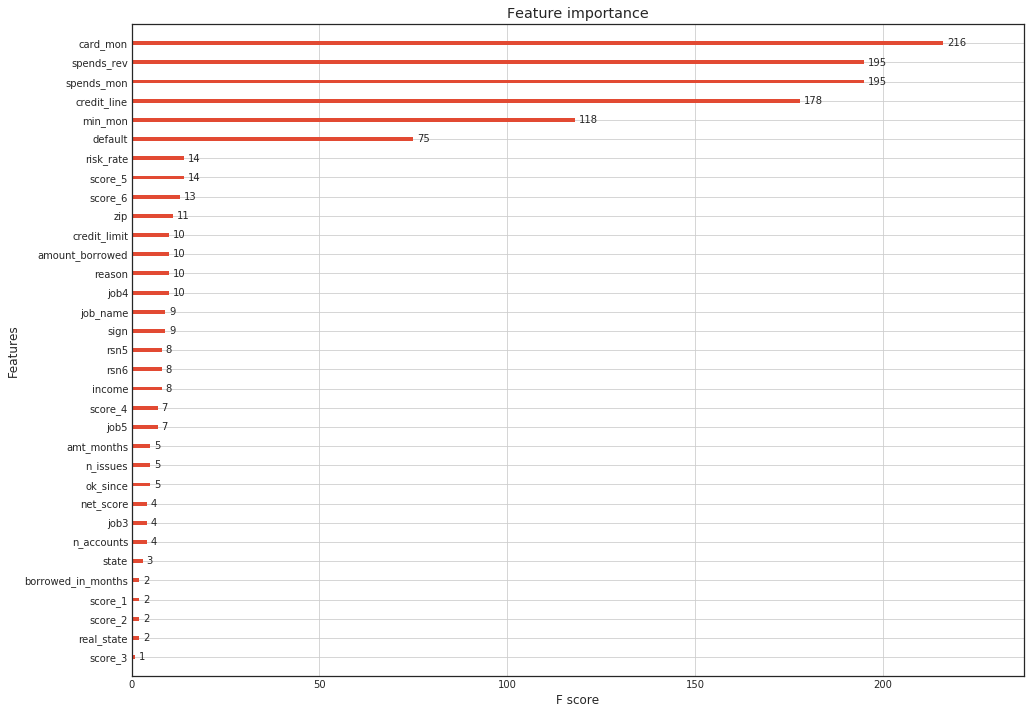

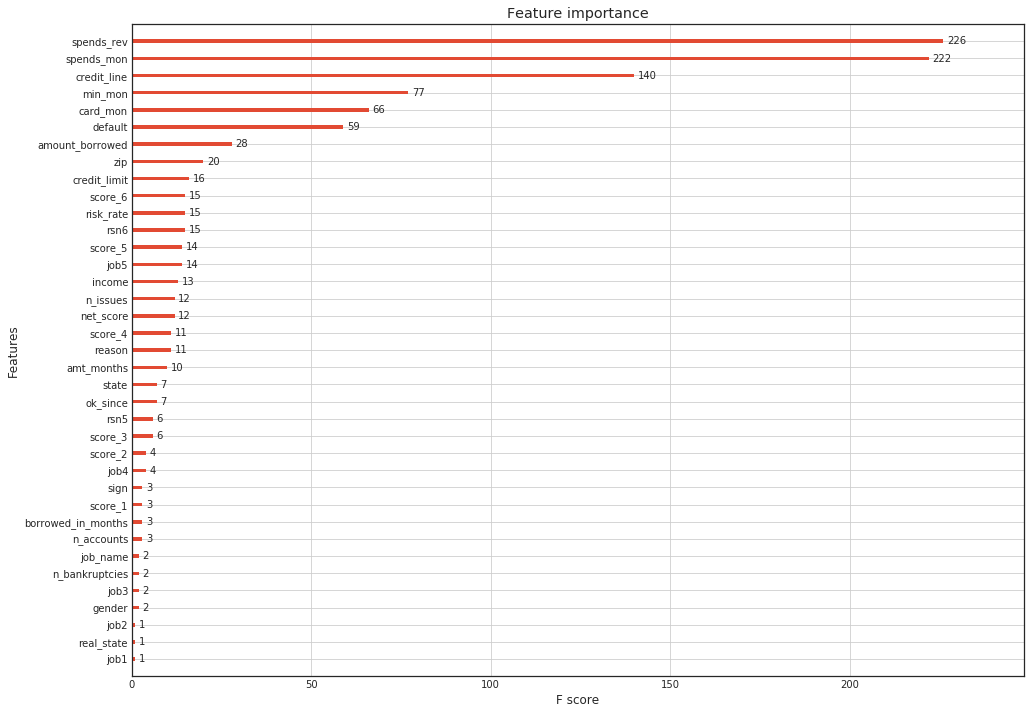

In [1135]:
models=[]
for i in ['net_profit','profit_mon']:
    print(i)
    for k,j in enumerate([profit_col]):
        print('profit_col',k)
        train_profit=df_train[j]
        # test_profit=df_test[profit_col]
        target_profit=df_train[i]
        train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        # test_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        # train_def1=df_def1[test_col1]
        # train_def1.drop(['ids','job1','job2','job3','rsn1','rsn2','rsn3','rsn4','channel','end_last_loan','last_payment','days'],axis=1,inplace=True)
        # target_def1=df_def1['default']
        train_profit=train_profit.fillna(np.nan)
        # test_profit=test_profit.fillna(np.nan)
        train_X, test_X, train_target, test_target= train_test_split(train_profit , target_profit, train_size = 0.80,
                                                 stratify=df_train.loss ,  random_state=17)
        for c in behavior_targetcols:
            print(c)
            test_X[c]=beh_target[c]
        params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
                'eval_metric':'rmse' ,'silent':1}   
        xgtrain = xgb.DMatrix(train_X, label=train_target)
        xgtest= xgb.DMatrix(test_X,label=test_target) 

        watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
        num_round=38

        model=xgb.train(params,xgtrain,num_round,watchlist)
        models.append(model)
        xgb.plot_importance(model)
# 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

In [1126]:
test_X.head()

,amount_borrowed,borrowed_in_months,credit_limit,credit_line,default,facebook_profile,gender,income,job1,job2,...,score_6,sign,state,zip,net_score,amt_months,spends_mon,card_mon,min_mon,spends_rev
51475,20034.07,36.0,NaN,6332.714355,0.0,NaN,NaN,84018.70,1.0,14.0,...,86.660024,NaN,18.0,122.0,190.773456,556.501944,2809.323730,0.097605,2.799218,9.696451
31876,20532.21,60.0,52333.0,6166.401855,NaN,1.0,NaN,69693.03,1.0,14.0,...,100.015901,11.0,9.0,355.0,196.890316,342.203500,2739.098389,0.098529,2.724289,11.194098
23330,25031.29,60.0,63503.0,5890.606934,0.0,0.0,0.0,62031.65,1.0,14.0,...,117.736353,10.0,42.0,207.0,214.544288,417.188167,3007.933105,0.102982,2.814362,15.219429
8254,25471.94,36.0,29980.0,6381.488281,0.0,0.0,1.0,71019.14,1.0,14.0,...,106.469473,10.0,2.0,793.0,207.783607,707.553889,2870.304688,0.099288,2.775076,5.515213
53546,9774.78,60.0,25467.0,6343.163574,1.0,1.0,1.0,29010.02,1.0,14.0,...,96.181278,3.0,6.0,244.0,199.560166,162.913000,2932.421631,0.179110,2.683898,199.062973


In [20]:
df_test=pd.read_csv('Df_Test.csv')
df_test.head()

,amount_borrowed,borrowed_in_months,card_request,channel,credit_limit,credit_line,days,default,end_last_loan,facebook_profile,...,state,zip,net_score,amt_months,default_0.7,default_nosign_0.7,default_0.5,default_nosign_0.5,default_2,default_nosign_2
0,21016.38,36.0,NaN,0.0,43666.0,NaN,335.0,NaN,109.0,1.0,...,20.0,573.0,179.829767,583.788333,0,0,0,0,0,0
1,1211.74,36.0,NaN,0.0,NaN,NaN,1096.0,NaN,106.0,0.0,...,4.0,214.0,191.536117,33.659444,0,0,0,0,0,0
2,6990.63,36.0,NaN,0.0,NaN,NaN,0.0,NaN,56.0,1.0,...,6.0,129.0,207.932902,194.184167,0,0,0,0,0,0
3,15025.67,60.0,NaN,0.0,71273.0,NaN,274.0,NaN,106.0,1.0,...,11.0,362.0,223.069491,250.427833,0,0,0,0,0,0
4,7027.81,36.0,NaN,0.0,NaN,NaN,1430.0,NaN,106.0,0.0,...,47.0,737.0,208.700563,195.216944,0,0,0,0,0,0


In [1301]:
df_test.columns

Index(['amount_borrowed', 'borrowed_in_months', 'card_request', 'channel',
       'credit_limit', 'credit_line', 'days', 'default', 'end_last_loan',
       'facebook_profile', 'gender', 'ids', 'income', 'job1', 'job2', 'job3',
       'job4', 'job5', 'job_name', 'last_payment', 'min_mon', 'minutes_cs',
       'month', 'n_accounts', 'n_bankruptcies', 'n_defaulted_loans',
       'n_issues', 'net_profit', 'ok_since', 'profit', 'profit_credit',
       'profit_mon', 'real_state', 'reason', 'revolving_balance', 'risk_rate',
       'rsn1', 'rsn2', 'rsn3', 'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'sign', 'spends',
       'spends_mon', 'spends_rev', 'state', 'zip', 'net_score', 'amt_months',
       'default_0.7', 'default_nosign_0.7', 'default_0.5',
       'default_nosign_0.5', 'default_2', 'default_nosign_2'],
      dtype='object')

In [21]:
df_test=df_test[profit_col1+['default_nosign_0.5']]
df_test.shape

(35000, 42)

In [22]:
df_test['default']=df_test['default_nosign_0.5']

In [1304]:
# with default_0.5
for i in behavior_targetcols:
    print('target',i)
    train_profit=df_train[behavior_col]
    target_profit=df_train[i]
    train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
    train_profit=train_profit.fillna(np.nan)
    test_profit=df_test[behavior_col]
    test_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
    test_profit=test_profit.fillna(np.nan)
    print(test_profit.shape)
    params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'rmse' ,'silent':0}   
    xgtrain = xgb.DMatrix(train_profit, label=target_profit)
    watchlist =   [(xgtrain, 'train')]
    num_round=40
    model=xgb.train(params,xgtrain,num_round,watchlist)
    
    test_x=xgb.DMatrix(test_profit)
    pred=model.predict(test_x)
    try:
        test_beh[i]=pred
    except:
        test_beh=pd.DataFrame({i:pred},index=test_profit.index)

target spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 38)
[22:01:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:3352.38
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:3157.82
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:2989.79
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:2847.34
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:2725.89
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:2623.29
[22:01:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, m

[22:02:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4658.46
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:4633.14
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:4612.69
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:4596
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:4582.88
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21]	train-rmse:4571.45
[22:02:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=

[22:02:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[32]	train-rmse:0.059742
[22:02:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[33]	train-rmse:0.059455
[22:02:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-rmse:0.059245
[22:02:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[35]	train-rmse:0.059056
[22:02:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[36]	train-rmse:0.058886
[22:02:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[37]	train-rmse:0.058759
[22:02:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, m

[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:500.389
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:497.62
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:495.585
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:493.709
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:492.371
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:490.407
[22:02:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=

In [31]:
# with default_nosign_0.5
for i in behavior_targetcols:
    print('target',i)
    train_profit=df_train[behavior_col]
    target_profit=df_train[i]
    train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
    train_profit=train_profit.fillna(np.nan)
    test_profit=df_test[behavior_col]
    test_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
    test_profit=test_profit.fillna(np.nan)
    print(test_profit.shape)
    params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'rmse' ,'silent':0}   
    xgtrain = xgb.DMatrix(train_profit, label=target_profit)
    watchlist =   [(xgtrain, 'train')]
    num_round=40
    model=xgb.train(params,xgtrain,num_round,watchlist)
    
    test_x=xgb.DMatrix(test_profit)
    pred=model.predict(test_x)
    try:
        test_beh[i]=pred
    except:
        test_beh=pd.DataFrame({i:pred},index=test_profit.index)

target spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 38)
[09:01:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:3352.38
[09:01:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:3157.82
[09:01:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:2989.79
[09:01:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:2847.34
[09:01:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:2725.89
[09:01:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:2623.29
[09:01:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, m

[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4658.46
[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:4633.14
[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:4612.69
[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:4596
[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:4582.88
[09:01:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21]	train-rmse:4571.45
[09:01:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=

[09:01:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[32]	train-rmse:0.059742
[09:01:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[33]	train-rmse:0.059455
[09:01:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-rmse:0.059245
[09:01:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[35]	train-rmse:0.059056
[09:01:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[36]	train-rmse:0.058886
[09:01:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[37]	train-rmse:0.058759
[09:01:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, m

[09:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:500.389
[09:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:497.62
[09:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:495.585
[09:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:493.709
[09:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:492.371
[09:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:490.407
[09:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=

In [1306]:
#with default_0.5
for i in behavior_targetcols:
    print('target',i)
    train_profit=df_train[behavior_col]
    target_profit=df_train[i]
    train_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
    train_profit=train_profit.fillna(np.nan)
    test_profit=df_test[behavior_col]
    test_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
    test_profit=test_profit.fillna(np.nan)
    print(test_profit.shape)
    params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'rmse' ,'silent':0}   
    xgtrain = xgb.DMatrix(train_profit, label=target_profit)
    watchlist =   [(xgtrain, 'train')]
    num_round=40
    model=xgb.train(params,xgtrain,num_round,watchlist)
    
    test_x=xgb.DMatrix(test_profit)
    pred=model.predict(test_x)
    try:
        test_beh_nodef[i]=pred
    except:
        test_beh_nodef=pd.DataFrame({i:pred},index=test_profit.index)

target spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 37)
[22:03:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:3352.38
[22:03:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:3156.98
[22:03:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:2990.71
[22:03:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:2847.48
[22:03:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:2725.28
[22:03:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:2623.43
[22:03:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, m

[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4660.51
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:4635.37
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:4615.37
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:4598.14
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:4583.64
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[21]	train-rmse:4572.96
[22:03:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_dep

[22:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[32]	train-rmse:0.066476
[22:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[33]	train-rmse:0.066234
[22:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-rmse:0.066047
[22:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[35]	train-rmse:0.065873
[22:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[36]	train-rmse:0.065726
[22:03:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[37]	train-rmse:0.0656
[22:03:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max

[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:506.947
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:506.035
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:504.734
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:503.425
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:502.315
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:500.666
[22:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth

In [32]:
#with default_nosign_0.5
for i in behavior_targetcols:
    print('target',i)
    train_profit=df_train[behavior_col]
    target_profit=df_train[i]
    train_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
    train_profit=train_profit.fillna(np.nan)
    test_profit=df_test[behavior_col]
    test_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
    test_profit=test_profit.fillna(np.nan)
    print(test_profit.shape)
    params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'rmse' ,'silent':0}   
    xgtrain = xgb.DMatrix(train_profit, label=target_profit)
    watchlist =   [(xgtrain, 'train')]
    num_round=40
    model=xgb.train(params,xgtrain,num_round,watchlist)
    
    test_x=xgb.DMatrix(test_profit)
    pred=model.predict(test_x)
    try:
        test_beh_nodef[i]=pred
    except:
        test_beh_nodef=pd.DataFrame({i:pred},index=test_profit.index)

target spends_mon


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 37)
[09:02:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:3352.38
[09:02:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:3156.98
[09:02:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:2990.71
[09:02:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:2847.48
[09:02:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:2725.28
[09:02:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:2623.43
[09:02:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, m

[09:02:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4660.51
[09:02:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:4635.37
[09:02:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:4615.37
[09:02:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:4598.14
[09:02:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:4583.64
[09:02:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[21]	train-rmse:4572.96
[09:02:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_dep

[09:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[32]	train-rmse:0.066476
[09:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[33]	train-rmse:0.066234
[09:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-rmse:0.066047
[09:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[35]	train-rmse:0.065873
[09:02:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[36]	train-rmse:0.065726
[09:02:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[37]	train-rmse:0.0656
[09:02:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max

[09:02:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:506.947
[09:02:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:506.035
[09:02:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:504.734
[09:02:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:503.425
[09:02:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:502.315
[09:02:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:500.666
[09:02:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth

In [33]:
test_beh.head()

,spends_mon,credit_line,card_mon,min_mon,spends_rev
0,2838.808594,6251.935059,0.097947,2.757670,6.809380
1,2839.362793,6789.996094,0.101997,2.907554,20.160532
2,2749.981689,6154.237305,0.100576,2.745550,9.190013
3,2625.576172,5716.565918,0.107875,2.777107,10.509717
4,2824.748047,6404.102539,0.099925,2.732069,9.658142


In [34]:
test_beh_nodef.head()

,spends_mon,credit_line,card_mon,min_mon,spends_rev
0,2781.142578,6384.868164,0.108755,2.769200,14.273438
1,3110.238525,6849.199219,0.131663,2.933188,99.334404
2,2805.409180,6248.049316,0.119525,2.858289,30.230061
3,2765.707275,6287.047852,0.127551,2.515013,139.708694
4,2804.736816,6505.781738,0.115123,2.747968,32.790760


In [35]:
Df_Test=pd.concat([df_test,test_beh],axis=1)

In [36]:
Df_Test_nodef=pd.concat([df_test,test_beh_nodef],axis=1)

In [1308]:
for i in profit_col:
    if i=='default':
        print('k')

k


net_profit
profit_col 0


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 43)
[0]	train-rmse:5891.12
[1]	train-rmse:5420.1
[2]	train-rmse:4960.05
[3]	train-rmse:4708.95
[4]	train-rmse:4358.77
[5]	train-rmse:4016.74
[6]	train-rmse:3753.84
[7]	train-rmse:3490.66
[8]	train-rmse:3258.01
[9]	train-rmse:3057.47
[10]	train-rmse:2887.51
[11]	train-rmse:2728.22
[12]	train-rmse:2594.57
[13]	train-rmse:2485.34
[14]	train-rmse:2389.64
[15]	train-rmse:2298.15
[16]	train-rmse:2219.79
[17]	train-rmse:2176.08
[18]	train-rmse:2120.79
[19]	train-rmse:2089.31
[20]	train-rmse:2039.01
[21]	train-rmse:2016.03
[22]	train-rmse:1978.46
[23]	train-rmse:1946.24
[24]	train-rmse:1918.91
[25]	train-rmse:1894.46
[26]	train-rmse:1872.78
[27]	train-rmse:1855.75
[28]	train-rmse:1839.63
[29]	train-rmse:1826.42
[30]	train-rmse:1813.47
[31]	train-rmse:1803.08
[32]	train-rmse:1792.14
[33]	train-rmse:1778.1
[34]	train-rmse:1769.8
[35]	train-rmse:1759.24
[36]	train-rmse:1751.52
[37]	train-rmse:1741.94
profit_col 1
(35000, 38)
[0]	train-rmse:6112.5
[1]	train-rmse:5811.81
[2]	train-rmse:5554

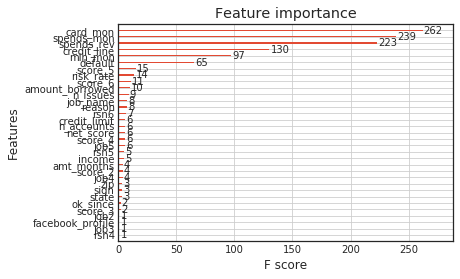

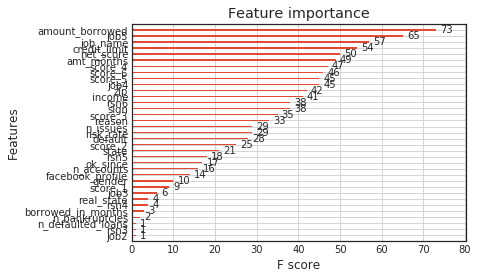

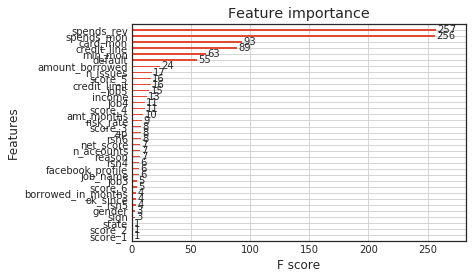

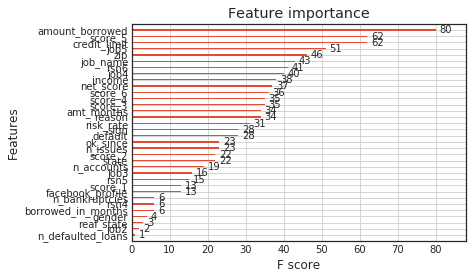

In [37]:
#with defaul_nosign_0.5
models=[]
for i in ['net_profit','profit_mon']:
    print(i)
    for k,j in enumerate([profit_col,profit_col1+['default']]):
        print('profit_col',k)
        train_profit=df_train[j]
        target_profit=df_train[i]
        train_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        train_profit=train_profit.fillna(np.nan)
        test_profit=Df_Test[j]
        test_profit.drop(['ids','end_last_loan','last_payment','days'],inplace=True,axis=1)
        test_profit=test_profit.fillna(np.nan)
        print(test_profit.shape)
        params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
                'eval_metric':'rmse' ,'silent':1}   
        xgtrain = xgb.DMatrix(train_profit, label=target_profit)
        watchlist =  [(xgtrain, 'train')]
        num_round=38
        model=xgb.train(params,xgtrain,num_round,watchlist)
        test_x=xgb.DMatrix(test_profit)
        pred=model.predict(test_x)
        try:
            Df_Profit[i+str(k)]=pred
        except:
            Df_Profit=pd.DataFrame({i+str(k):pred},index=test_profit.index)
        models.append(model)
        xgb.plot_importance(model)
    # 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

net_profit
profit_col 0


/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(35000, 42)
[0]	train-rmse:5930.99
[1]	train-rmse:5453.66
[2]	train-rmse:5030.37
[3]	train-rmse:4656.57
[4]	train-rmse:4326.39
[5]	train-rmse:4037.79
[6]	train-rmse:3773.46
[7]	train-rmse:3556.02
[8]	train-rmse:3371.96
[9]	train-rmse:3199.42
[10]	train-rmse:3096.26
[11]	train-rmse:3015.69
[12]	train-rmse:2894.5
[13]	train-rmse:2787.13
[14]	train-rmse:2687.77
[15]	train-rmse:2647.32
[16]	train-rmse:2576.25
[17]	train-rmse:2513.12
[18]	train-rmse:2456.94
[19]	train-rmse:2429.2
[20]	train-rmse:2383.69
[21]	train-rmse:2345.8
[22]	train-rmse:2311.5
[23]	train-rmse:2279.48
[24]	train-rmse:2256.58
[25]	train-rmse:2234.28
[26]	train-rmse:2212.79
[27]	train-rmse:2202.89
[28]	train-rmse:2183.78
[29]	train-rmse:2168.06
[30]	train-rmse:2154.8
[31]	train-rmse:2140.41
[32]	train-rmse:2129.24
[33]	train-rmse:2120.35
[34]	train-rmse:2112.51
[35]	train-rmse:2104.55
[36]	train-rmse:2088.96
[37]	train-rmse:2078.54
profit_col 1
(35000, 37)
[0]	train-rmse:6150.46
[1]	train-rmse:5882.32
[2]	train-rmse:5657.

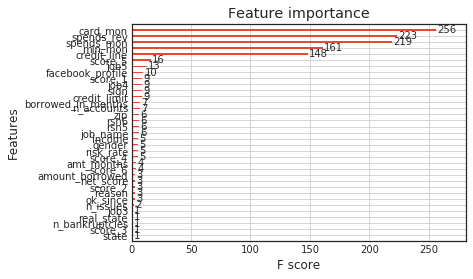

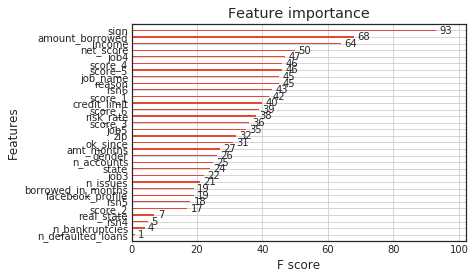

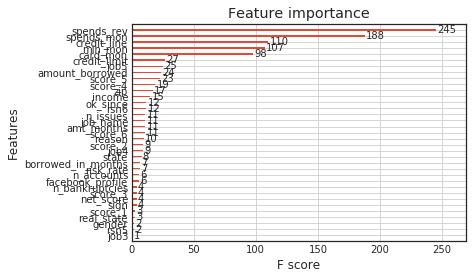

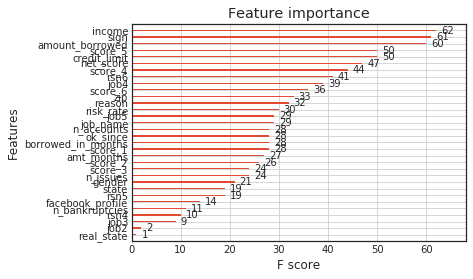

In [38]:
models_nodef=[]
for i in ['net_profit','profit_mon']:
    print(i)
    for k,j in enumerate([profit_col,profit_col1+['default']]):
        print('profit_col',k)
        train_profit=df_train[j]
        target_profit=df_train[i]
        train_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
        train_profit=train_profit.fillna(np.nan)
        test_profit=Df_Test_nodef[j]
        test_profit.drop(['ids','end_last_loan','last_payment','days','default'],inplace=True,axis=1)
        test_profit=test_profit.fillna(np.nan)
        print(test_profit.shape)
        params={'objective': 'reg:linear','max_depth': 5,'eta': 0.1,'colsample_bytree':0.7,'subsample':0.7,
                'eval_metric':'rmse' ,'silent':1}   
        xgtrain = xgb.DMatrix(train_profit, label=target_profit)
        watchlist =  [(xgtrain, 'train')]
        num_round=38
        model=xgb.train(params,xgtrain,num_round,watchlist)
        test_x=xgb.DMatrix(test_profit)
        pred=model.predict(test_x)
        try:
            Df_Profit_nodef[i+'nodef'+str(k)]=pred
        except:
            Df_Profit_nodef=pd.DataFrame({i+'nodef'+str(k):pred},index=test_profit.index)
        models_nodef.append(model)
        xgb.plot_importance(model)
    # 'colsample_bytree':0.8,'subsample':0.8, 'num_class':18

In [1244]:
train_profit.columns

Index(['amount_borrowed', 'borrowed_in_months', 'credit_limit', 'days',
       'end_last_loan', 'facebook_profile', 'gender', 'ids', 'income', 'job1',
       'job2', 'job3', 'job4', 'job5', 'job_name', 'last_payment',
       'n_accounts', 'n_bankruptcies', 'n_defaulted_loans', 'n_issues',
       'ok_since', 'real_state', 'reason', 'risk_rate', 'rsn1', 'rsn2', 'rsn3',
       'rsn4', 'rsn5', 'rsn6', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'sign', 'state', 'zip', 'net_score',
       'amt_months'],
      dtype='object')

In [42]:
Df_Profit.head()

,net_profit0,net_profit1,profit_mon0,profit_mon1
0,5129.851074,4989.087402,203.364136,213.223068
1,3617.114014,5083.309082,161.500229,213.210876
2,4438.959961,5136.501953,183.815735,208.375687
3,4046.560791,5304.751465,169.758865,212.740967
4,4592.337891,5144.500488,185.179260,211.473816


In [43]:
Df_Profit_nodef.head()# netprofit1 and netprofitnodef1 are same and vice versa

,net_profitnodef0,net_profitnodef1,profit_monnodef0,profit_monnodef1
0,3951.202637,4489.322754,161.461914,183.227066
1,2151.531982,3375.406494,96.165016,126.215683
2,3422.172119,4173.273926,144.616837,169.903931
3,1545.985840,3776.734375,49.139439,130.620438
4,3272.537842,3983.148193,133.235611,178.661957


In [1317]:
Df_Test.shape

(35000, 48)

In [39]:
df_test=pd.read_csv('Df_Test.csv')
default_col=['default_0.7',
       'default_nosign_0.7', 'default_0.5', 'default_nosign_0.5', 'default_2',
       'default_nosign_2']
for i in default_col:
    Df_Test[i]=df_test[i]

In [1321]:
Df_Test.head()

,amount_borrowed,borrowed_in_months,credit_limit,days,end_last_loan,facebook_profile,gender,ids,income,job1,...,spends_mon,credit_line,card_mon,min_mon,spends_rev,default_0.7,default_nosign_0.7,default_nosign_0.5,default_2,default_nosign_2
0,21016.38,36.0,43666.0,335.0,109,1,1,88715,156021.02,1,...,2838.808594,6251.935059,0.097947,2.757670,6.809380,0,0,0,0,0
1,1211.74,36.0,NaN,1096.0,106,0,0,76917,8410.56,1,...,2839.362793,6789.996094,0.101997,2.907554,20.160532,0,0,0,0,0
2,6990.63,36.0,NaN,0.0,56,1,0,65485,45116.60,1,...,2749.981689,6154.237305,0.100576,2.745550,9.190013,0,0,0,0,0
3,15025.67,60.0,71273.0,274.0,106,1,0,76700,60029.26,1,...,2625.576172,5716.565918,0.107875,2.777107,10.509717,0,0,0,0,0
4,7027.81,36.0,NaN,1430.0,106,0,1,10505,27618.96,1,...,2824.748047,6404.102539,0.099925,2.732069,9.658142,0,0,0,0,0


In [1322]:
Predicted_Profit=pd.concat([Df_Test,Df_Profit],axis=1)

In [1323]:
Predicted_Profit=pd.concat([Predicted_Profit,Df_Profit_nodef],axis=1)

In [40]:
Predicted_Profit_nosign=pd.concat([Df_Test,Df_Profit],axis=1) # with default_nosign_0.5
Predicted_Profit_nosign=pd.concat([Predicted_Profit_nosign,Df_Profit_nodef],axis=1)

In [1324]:
Predicted_Profit.shape

(35000, 61)

In [1325]:
Predicted_Profit.to_csv('Predicted_Customers.csv')

In [41]:
Predicted_Profit_nosign.to_csv('Predicted_Customers_nosign.csv',index=False)

In [4]:
Predicted_Profit_nosign=pd.read_csv('Predicted_Customers_nosign.csv')

In [1326]:
Predicted_Profit.head()

,amount_borrowed,borrowed_in_months,credit_limit,days,end_last_loan,facebook_profile,gender,ids,income,job1,...,default_2,default_nosign_2,net_profit0,net_profit1,profit_mon0,profit_mon1,net_profitnodef0,net_profitnodef1,profit_monnodef0,profit_monnodef1
0,21016.38,36.0,43666.0,335.0,109,1,1,88715,156021.02,1,...,0,0,5129.851074,4989.087402,203.364136,213.223068,3951.202637,4489.322754,161.461914,183.227066
1,1211.74,36.0,NaN,1096.0,106,0,0,76917,8410.56,1,...,0,0,3617.114014,5083.309082,161.500229,213.210876,2151.531982,3375.406494,96.165016,126.215683
2,6990.63,36.0,NaN,0.0,56,1,0,65485,45116.60,1,...,0,0,4438.959961,5136.501953,183.815735,208.375687,3422.172119,4173.273926,144.616837,169.903931
3,15025.67,60.0,71273.0,274.0,106,1,0,76700,60029.26,1,...,0,0,4046.560791,5304.751465,169.758865,212.740967,1545.985840,3776.734375,49.139439,130.620438
4,7027.81,36.0,NaN,1430.0,106,0,1,10505,27618.96,1,...,0,0,4592.337891,5144.500488,185.179260,211.473816,3272.537842,3983.148193,133.235611,178.661957


In [1240]:
Predicted_Profit[(Predicted_Profit.default==1)].shape

(1750, 57)

In [ ]:
Reading column names -
#profit_mon- profit/month, profit_monnodef: profit/month without use of predicted default value, 
# 0 represents use of predicted customer behavior+ credit scoring & 1 represents use of only credit scoring dataset

In [44]:
Predicted_Profit_nosign.head()

,amount_borrowed,borrowed_in_months,credit_limit,days,end_last_loan,facebook_profile,gender,ids,income,job1,...,default_2,default_nosign_2,net_profit0,net_profit1,profit_mon0,profit_mon1,net_profitnodef0,net_profitnodef1,profit_monnodef0,profit_monnodef1
0,21016.38,36.0,43666.0,335.0,109.0,1.0,1.0,88715,156021.02,1.0,...,0,0,5129.851074,4989.087402,203.364136,213.223068,3951.202637,4489.322754,161.461914,183.227066
1,1211.74,36.0,NaN,1096.0,106.0,0.0,0.0,76917,8410.56,1.0,...,0,0,3617.114014,5083.309082,161.500229,213.210876,2151.531982,3375.406494,96.165016,126.215683
2,6990.63,36.0,NaN,0.0,56.0,1.0,0.0,65485,45116.60,1.0,...,0,0,4438.959961,5136.501953,183.815735,208.375687,3422.172119,4173.273926,144.616837,169.903931
3,15025.67,60.0,71273.0,274.0,106.0,1.0,0.0,76700,60029.26,1.0,...,0,0,4046.560791,5304.751465,169.758865,212.740967,1545.985840,3776.734375,49.139439,130.620438
4,7027.81,36.0,NaN,1430.0,106.0,0.0,1.0,10505,27618.96,1.0,...,0,0,4592.337891,5144.500488,185.179260,211.473816,3272.537842,3983.148193,133.235611,178.661957


In [46]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.default==1)].shape

(1013, 61)

In [80]:
Predicted_Profit_nosign.profit_mon0.mean()

183.499755859375

In [81]:
Predicted_Profit_nosign.profit_mon0.max()

424.19888

In [76]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.default==1)&(Predicted_Profit_nosign.net_profit0<0)].shape

(60, 61)

In [77]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.default==1)&(Predicted_Profit_nosign.profit_mon0<0)].shape

(528, 61)

In [62]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.profit_mon0<0)].shape

(528, 61)

In [63]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.net_profit0<0)].shape

(370, 61)

In [60]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.default==1)&(Predicted_Profit_nosign.profit_monnodef0<0)].shape

(3, 61)

In [58]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.default==1)&(Predicted_Profit_nosign.net_profitnodef0<0)].shape

(0, 61)

In [83]:
Predicted_Profit_nosign[(Predicted_Profit_nosign.profit_mon0<0)&(Predicted_Profit_nosign.net_profit0<0)].shape

(209, 61)

In [7]:
Predicted_Profit_nosign['Approval_Status']='Approved'

In [8]:
Predicted_Profit_nosign.loc[(Predicted_Profit_nosign.profit_mon0<0)&(Predicted_Profit_nosign.net_profit0<0),'Approval_Status']='DisApproved'

In [9]:
Predicted_Profit_nosign.Approval_Status.value_counts()

Approved       34791
DisApproved      209
Name: Approval_Status, dtype: int64

In [5]:
profit_cols=['ids','credit_line','net_profit0' ,'profit_mon0','net_profitnodef0' ,'profit_monnodef0','Approval_Status'] 

In [10]:
Final_Profit_Prediction=Predicted_Profit_nosign[profit_cols]

In [12]:
Final_Profit_Prediction.to_csv('Final_Profit_Prediction.csv',index=False)

In [3]:
Final_Profit_Prediction=pd.read_csv('Final_Profit_Prediction.csv')

In [11]:
Final_Profit_Prediction

,ids,credit_line,net_profit0,profit_mon0,net_profitnodef0,profit_monnodef0,Approval_Status
0,88715,6251.9350,5129.8510,203.36414,3951.2026,161.461910,Approved
1,76917,6789.9960,3617.1140,161.50023,2151.5320,96.165016,Approved
2,65485,6154.2373,4438.9600,183.81573,3422.1720,144.616840,Approved
3,76700,5716.5660,4046.5608,169.75887,1545.9858,49.139440,Approved
4,10505,6404.1025,4592.3380,185.17926,3272.5378,133.235610,Approved
5,78550,7125.9030,4558.3020,192.13046,3427.5940,155.408230,Approved
6,60924,6392.5000,4898.7550,190.07837,3826.3450,159.227620,Approved
7,3378,6406.1855,4216.5280,172.54450,3492.4504,132.980160,Approved
8,48684,6172.1760,3543.2630,161.50023,2036.7501,122.111140,Approved
9,23683,6332.5054,5979.5850,239.06960,3220.3542,131.752030,Approved
